<a href="https://colab.research.google.com/github/AcererakTheMighty/StockMarketML/blob/main/StockMarketProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description: This program uses an artificial recurrent Neural Network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (Apple Inc,) using the past 60 day stock price

In [3]:
!pip install yfinance

In [4]:
#Importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
!pip install pandas_datareader

In [6]:
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483708,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754256,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734026,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.218658,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.774940,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.942558,137310400


In [7]:
df.shape

(2002, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

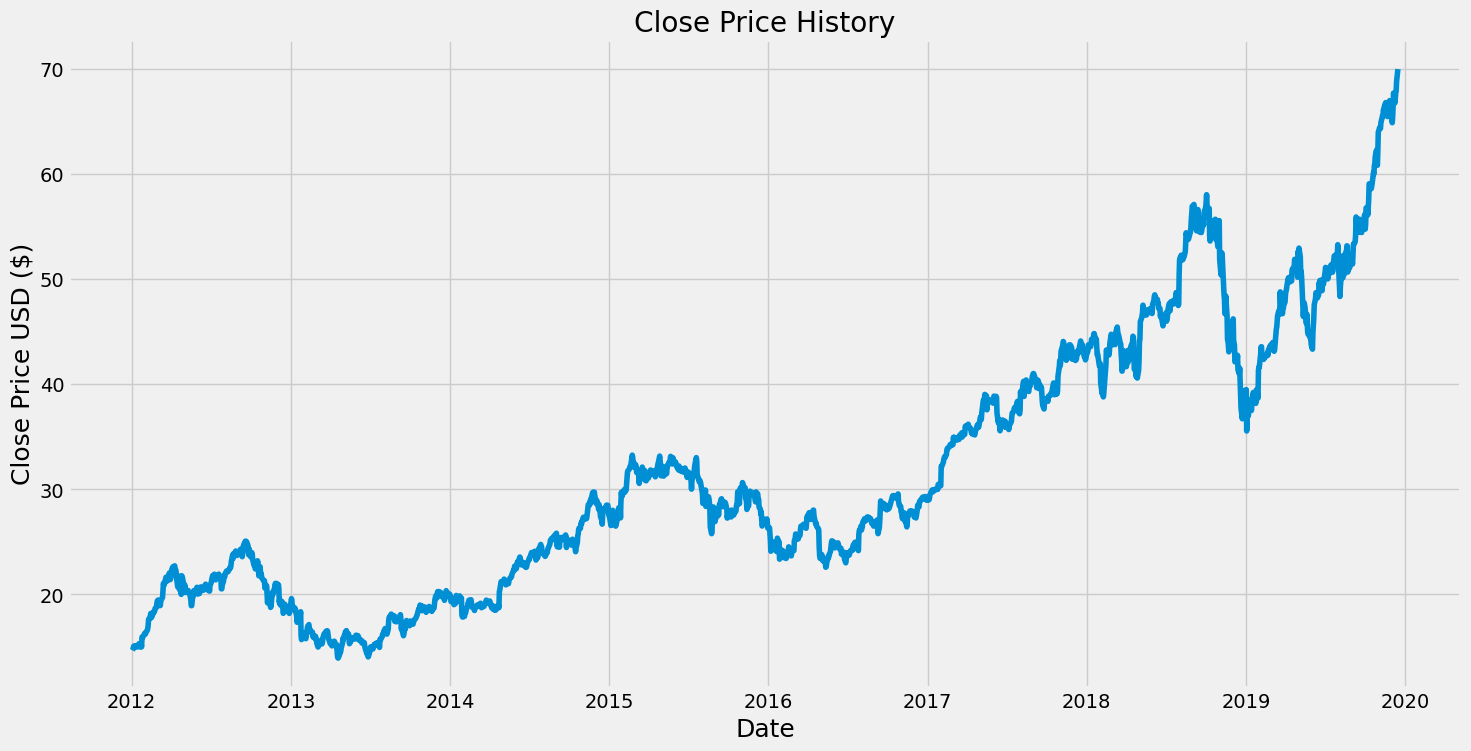

In [8]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show

In [9]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1602

In [10]:
#Scaling the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [11]:
#Creating the Training Dataset
#Creating the Scaled Training Dataset
train_data = scaled_data[0:training_data_len, :]
#Splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [12]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [14]:
#Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 58s 34ms/step - loss: 7.7380e-04


In [17]:
#Creating the testing dataset
#Creating a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Creating the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [18]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [19]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 13ms/step


In [21]:
#Getting the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.477128028869629

<ipython-input-22-c8fa4424eb2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


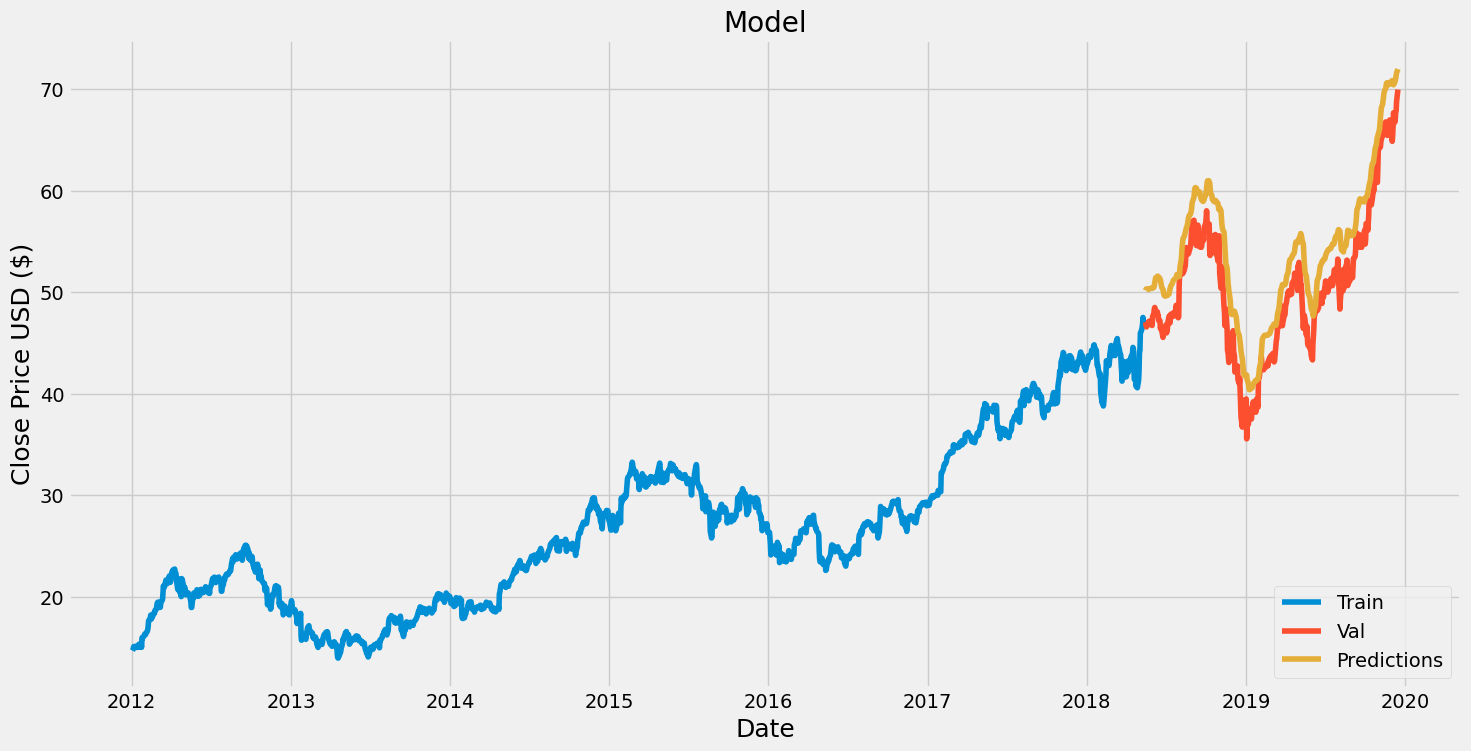

In [22]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
#Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,50.176949
2018-05-17,46.747501,50.292355
2018-05-18,46.577499,50.325821
2018-05-21,46.907501,50.293194
2018-05-22,46.790001,50.283768
...,...,...
2019-12-10,67.120003,70.876335
2019-12-11,67.692497,71.075027
2019-12-12,67.864998,71.334618


In [24]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
#Creating a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 25ms/step
[[72.52619]]


In [26]:
apple_quote2 = yf.download('AAPL', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2019-12-18 -> 2019-12-18)')


$AAPL: possibly delisted; No price data found  (1d 2019-12-18 -> 2019-12-18)
Series([], Name: Close, dtype: float64)
